In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn

In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn

Dataset Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<Figure size 1200x1000 with 0 Axes>

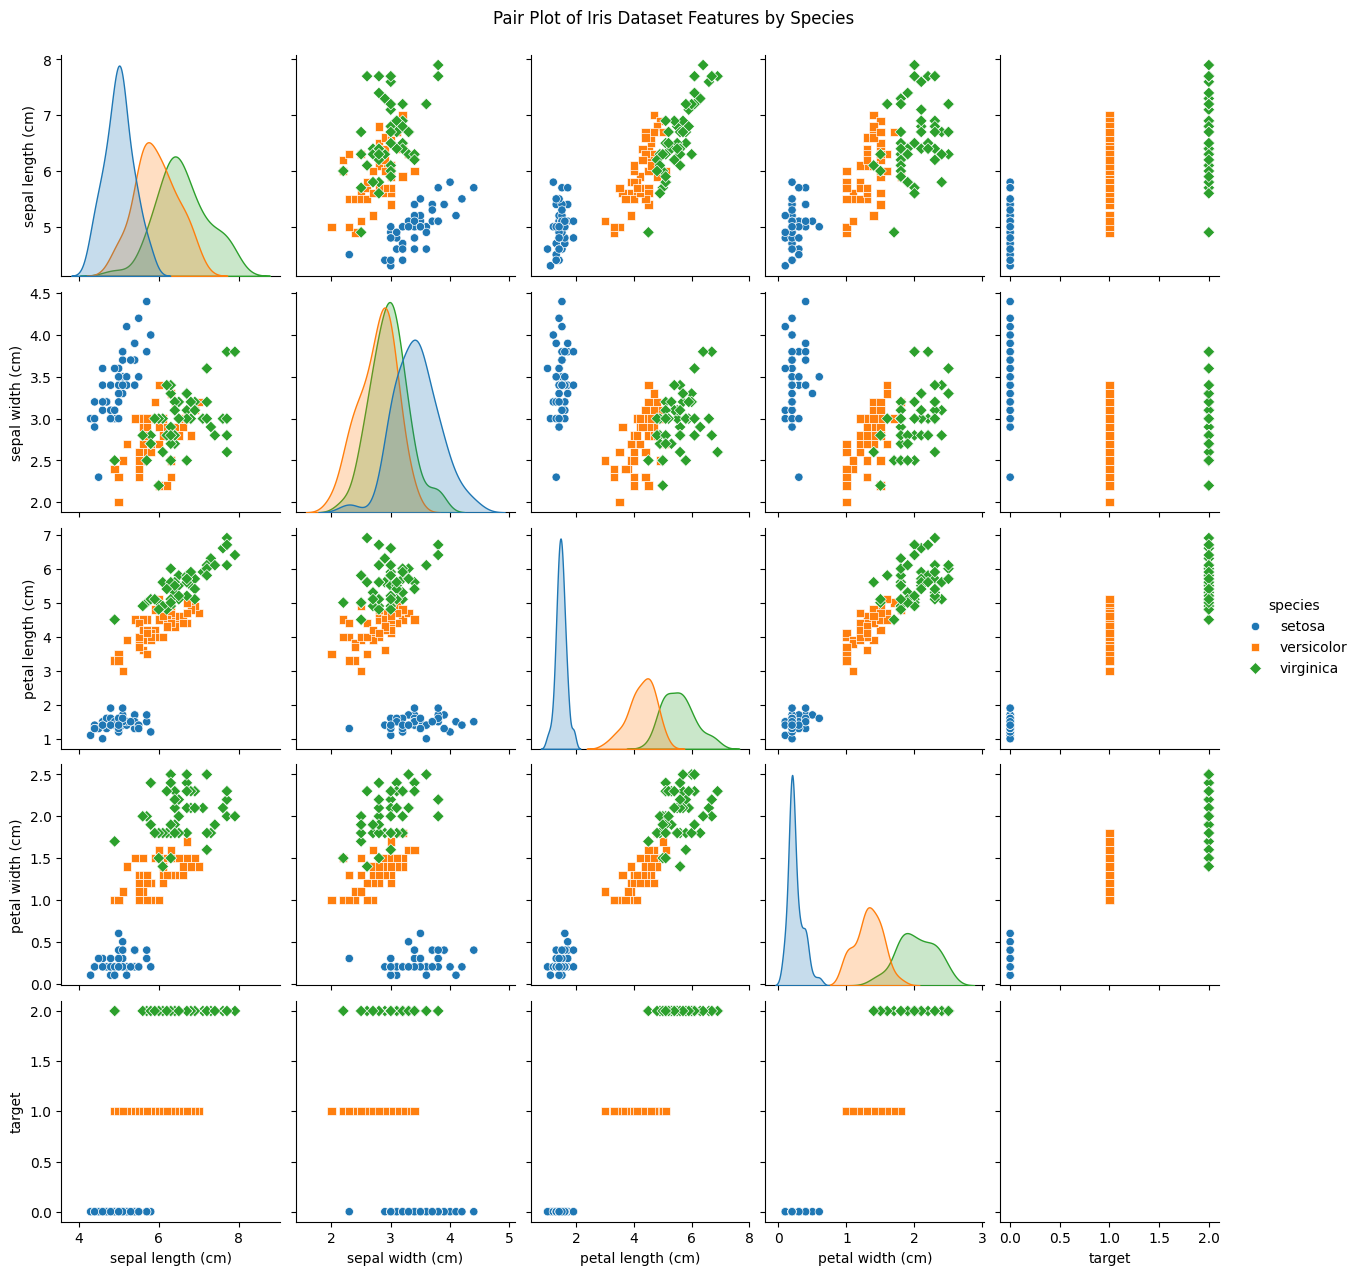

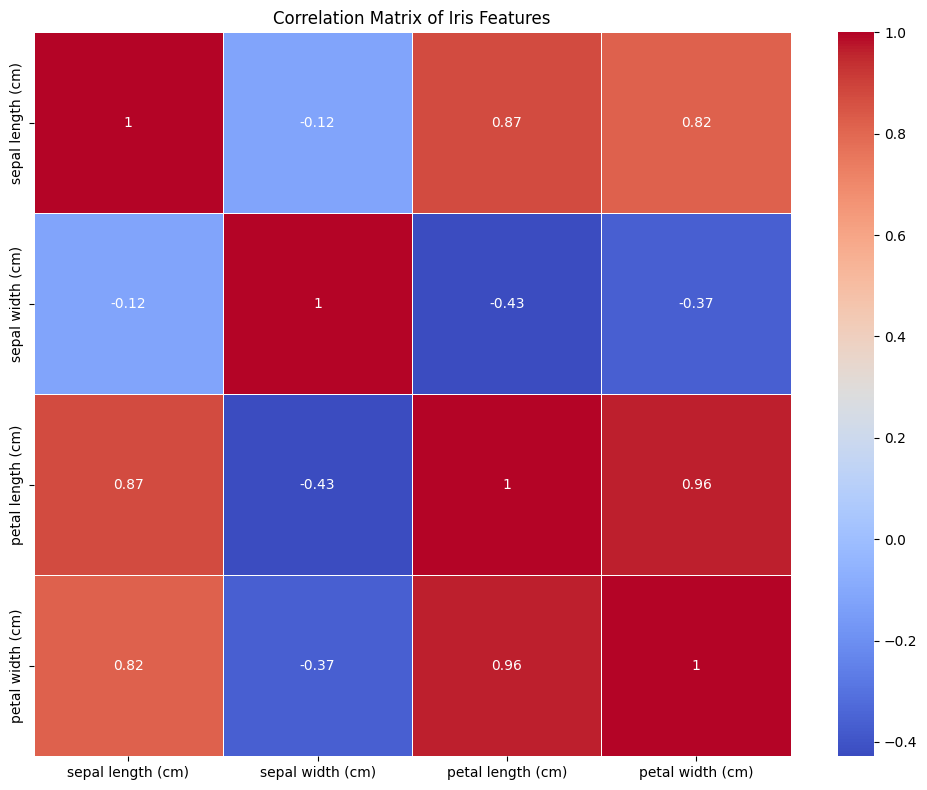

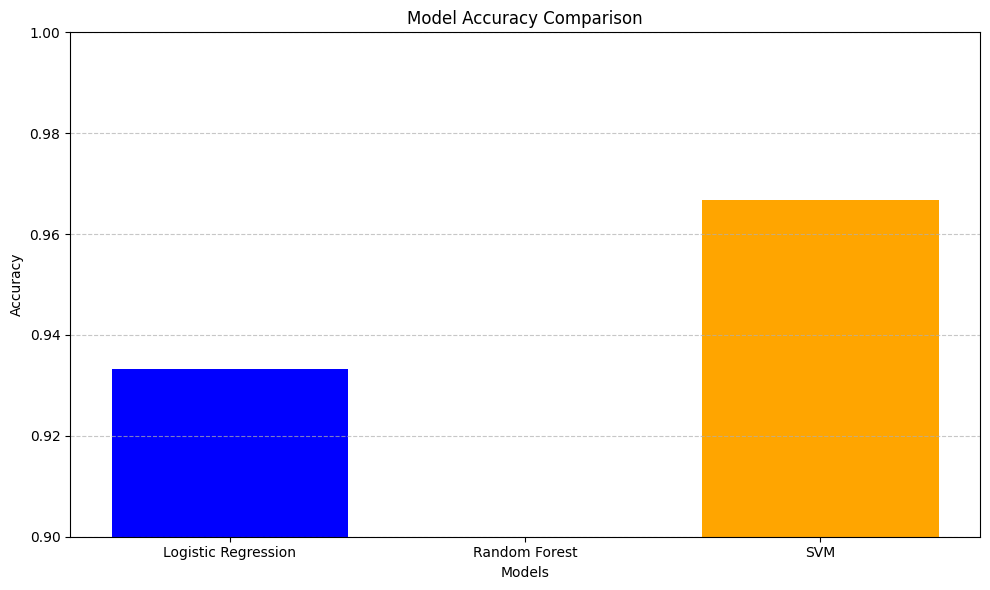

In [ ]:
# Iris Flower Classification using Supervised Learning

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Step 1: Load the dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: species of iris

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y
iris_df['species'] = iris_df['target'].map({
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
})

# Step 2: Exploratory Data Analysis
print("Dataset Overview:")
print(iris_df.head())
print("\nDataset Information:")
print(iris_df.info())
print("\nStatistical Summary:")
print(iris_df.describe())

# Check for missing values
print("\nMissing Values:")
print(iris_df.isnull().sum())

# Data Visualization
plt.figure(figsize=(12, 10))

# Pair plot to visualize relationships between features
sns.pairplot(iris_df, hue='species', markers=['o', 's', 'D'])
plt.suptitle('Pair Plot of Iris Dataset Features by Species', y=1.02)
plt.savefig('iris_pairplot.png')

# Create a correlation matrix
plt.figure(figsize=(10, 8))
correlation = iris_df.drop(['target', 'species'], axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Iris Features')
plt.tight_layout()
plt.savefig('iris_correlation.png')

# Step 3: Data Preprocessing
# Split the data into training and testing sets
X = iris_df.drop(['target', 'species'], axis=1)
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Model Training and Evaluation
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    }

    # Print results
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

# Step 5: Visualize model performance
plt.figure(figsize=(10, 6))
accuracies = [results[model]['accuracy'] for model in models]
plt.bar(models.keys(), accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Adjust as needed for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('model_comparison.png')

# Step 6: Select the best model based on accuracy
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = models[best_model_name]
best_accuracy = results[best_model_name]['accuracy']

print(f"\nBest Model: {best_model_name} with accuracy: {best_accuracy:.4f}")

# Step 7: Save the best model for future use
import joblib
joblib.dump(best_model, 'best_iris_model.pkl')
joblib.dump(scaler, 'iris_scaler.pkl')

# Step 8: Function to make predictions with the best model
def predict_iris_species(sepal_length, sepal_width, petal_length, petal_width):
    # Create a feature array
    features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    # Scale the features
    scaled_features = scaler.transform(features)
    # Make a prediction
    prediction = best_model.predict(scaled_features)
    # Map the prediction to species name
    species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
    return species_map[prediction[0]]

# Example prediction
sample_flower = [5.1, 3.5, 1.4, 0.2]  # Expected to be 'setosa'
print(f"\nPrediction for sample flower (sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2):")
print(f"Predicted species: {predict_iris_species(*sample_flower)}")

print("\nModel training and evaluation complete!")

Dataset Overview:
   Temperature   Humidity      Light      Water   Soil_pH  Health  \
0    25.483571  73.892663  97.987109  76.675416  5.959857       2   
1    22.308678  88.641250  88.492674  56.732214  6.384385       1   
2    26.238443  39.021486  71.192607  52.727017  5.866064       1   
3    30.615149  68.444539  57.061264  64.949383  6.253631       1   
4    21.829233  50.240361  83.964466  62.447231  4.985108       2   

  Health_Status  
0       Healthy  
1      Moderate  
2      Moderate  
3      Moderate  
4       Healthy  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    500 non-null    float64
 1   Humidity       500 non-null    float64
 2   Light          500 non-null    float64
 3   Water          500 non-null    float64
 4   Soil_pH        500 non-null    float64
 5   Health         500 n

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression Results:
Test Accuracy: 0.4880
Cross-Validation: 0.4620 (±0.0286)
Confusion Matrix:
[[ 0  8  0]
 [ 0 59  9]
 [ 0 47  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.52      0.87      0.65        68
           2       0.18      0.04      0.07        49

    accuracy                           0.49       125
   macro avg       0.23      0.30      0.24       125
weighted avg       0.35      0.49      0.38       125


K-Nearest Neighbors Results:
Test Accuracy: 0.7360
Cross-Validation: 0.6900 (±0.0276)
Confusion Matrix:
[[ 2  6  0]
 [ 0 55 13]
 [ 0 14 35]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.73      0.81      0.77        68
           2       0.73      0.71      0.72        49

    accuracy                           0.74       125
   macro avg     

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


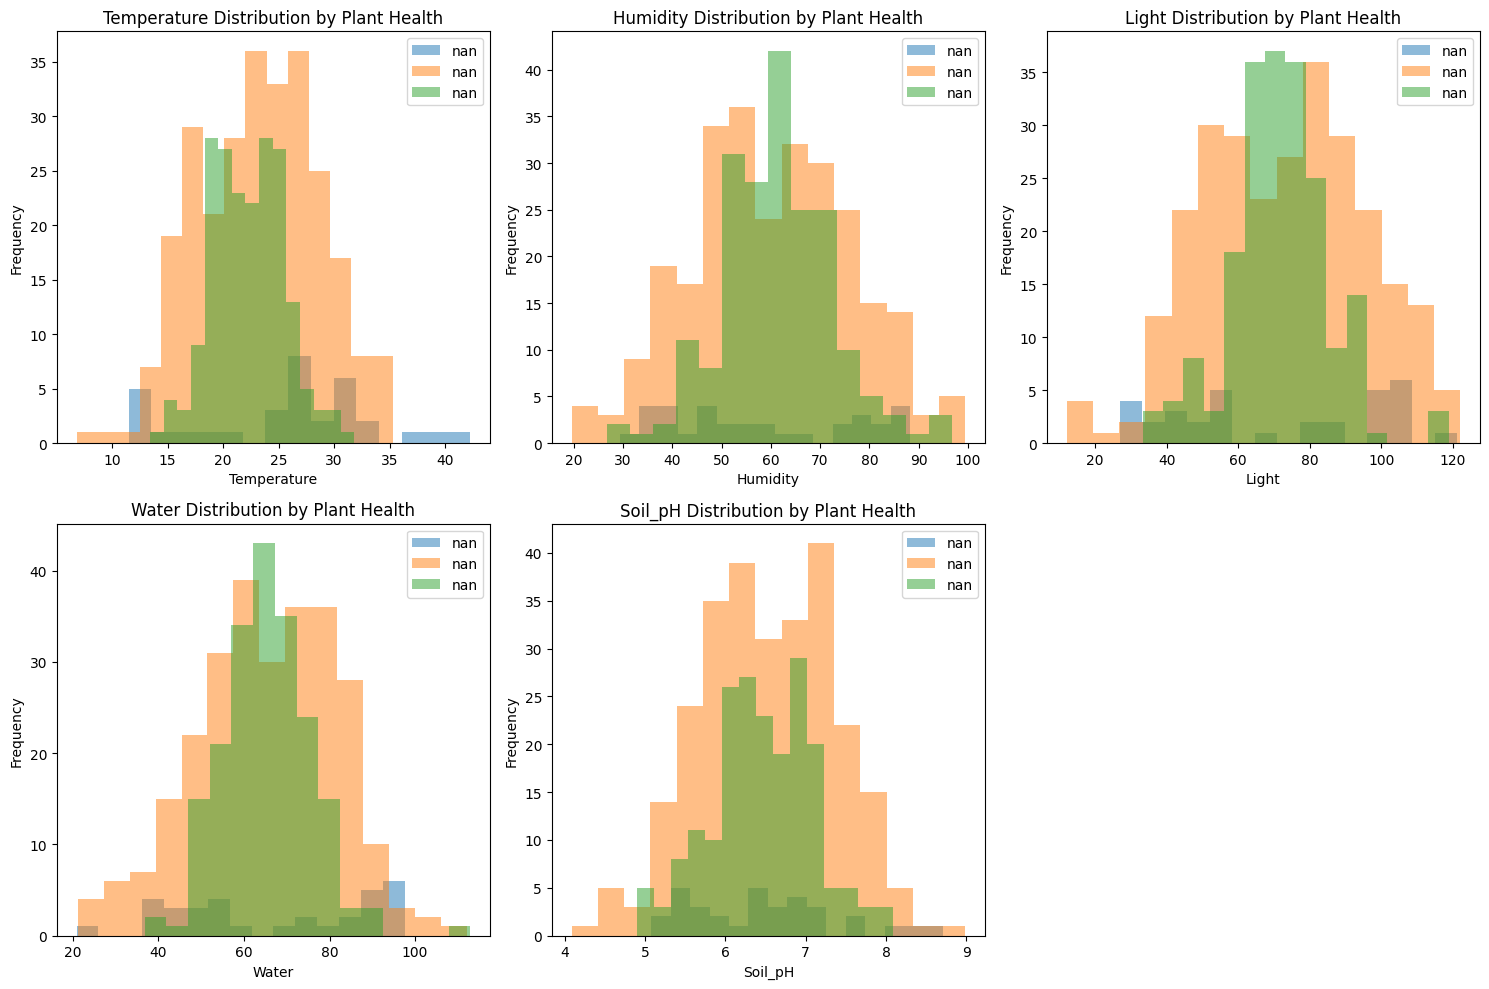

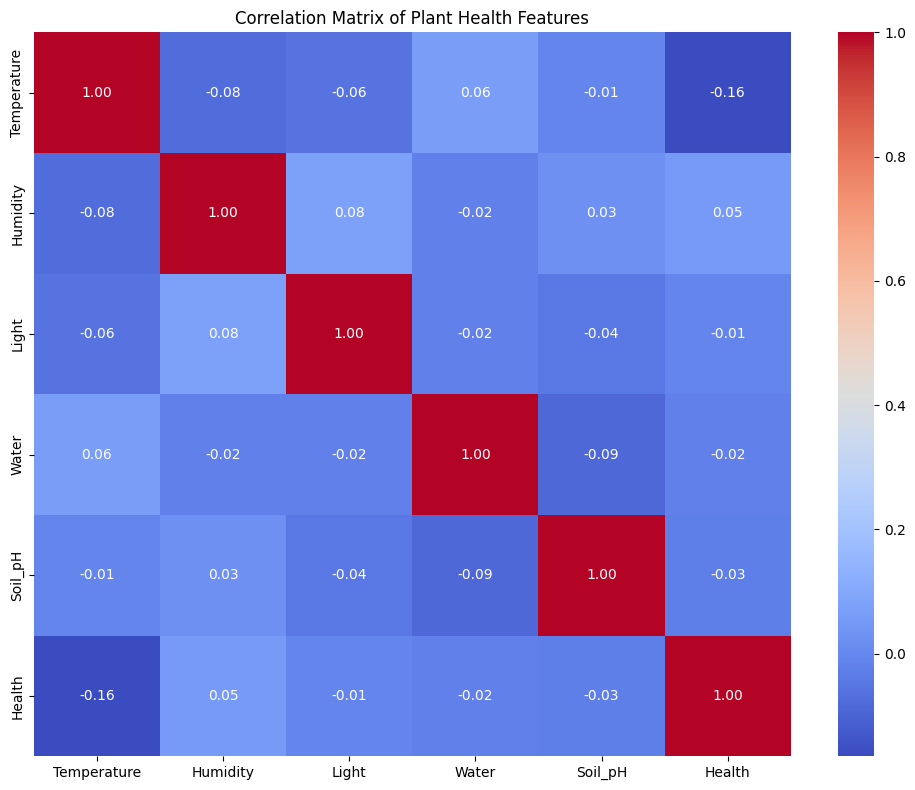

<Figure size 1200x1000 with 0 Axes>

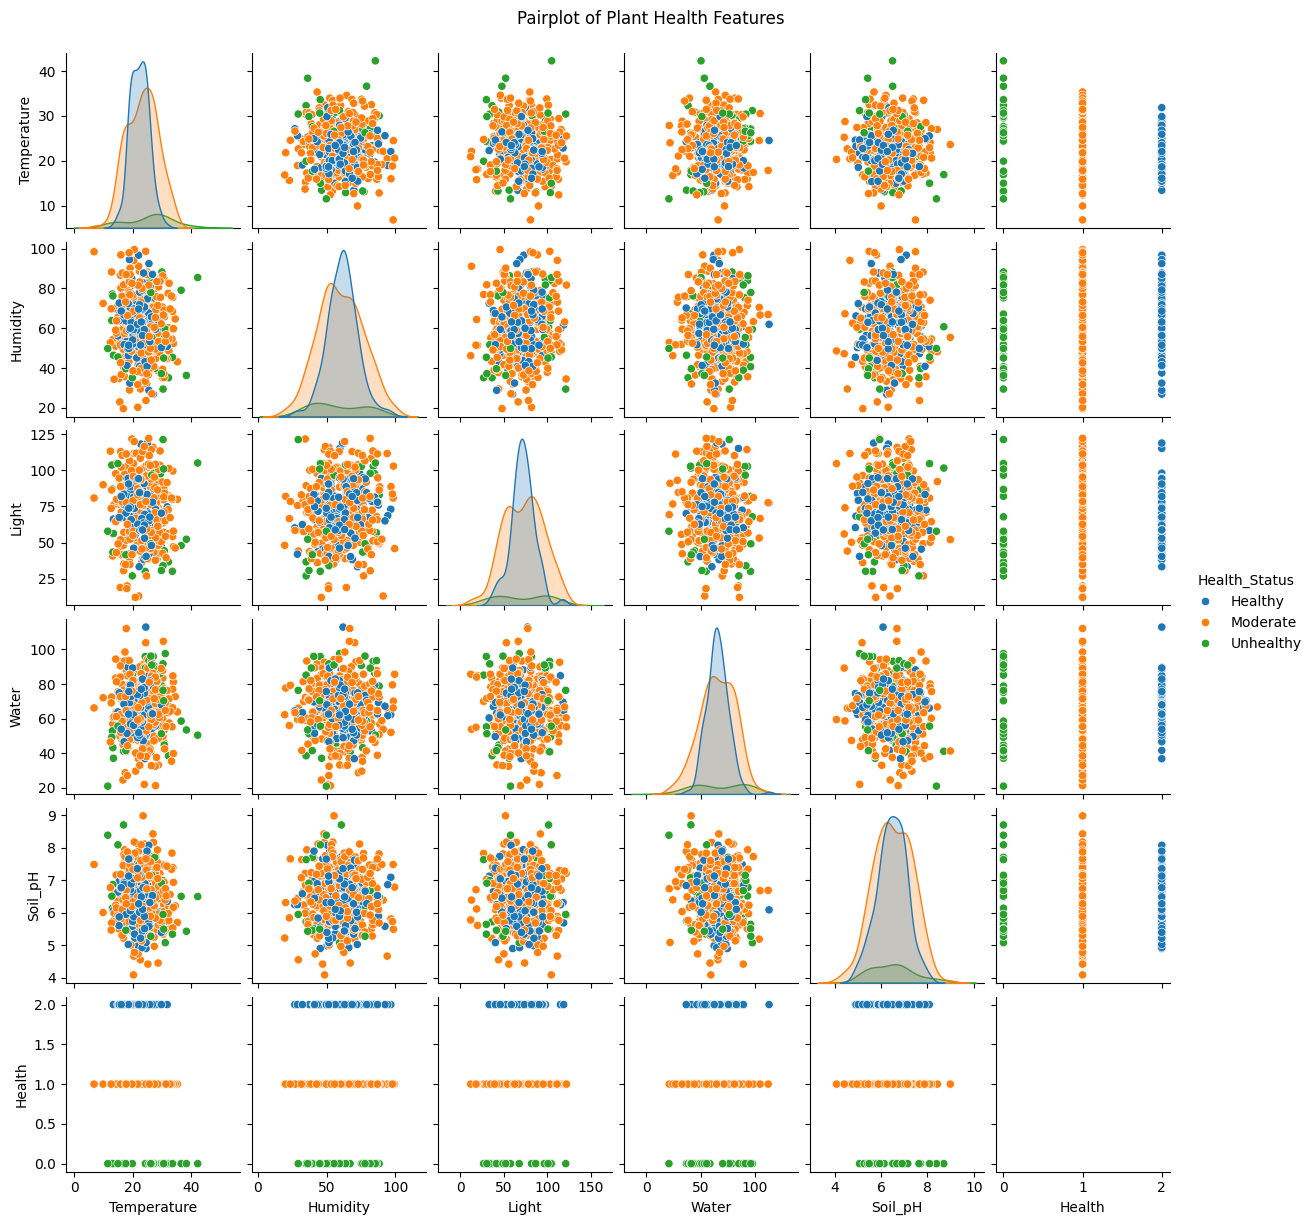

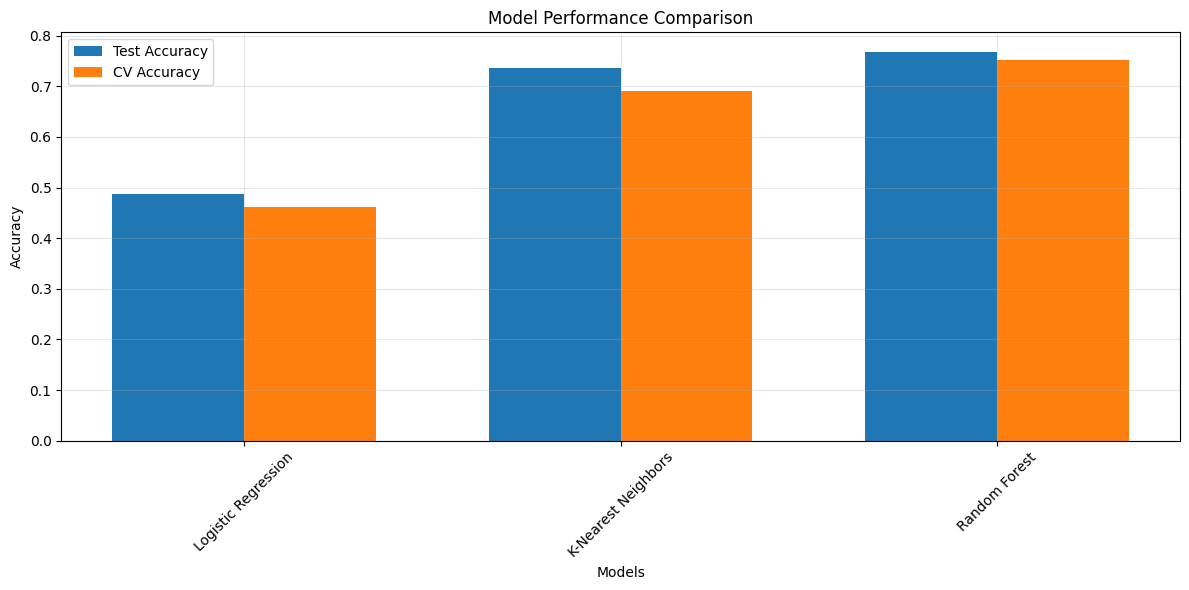

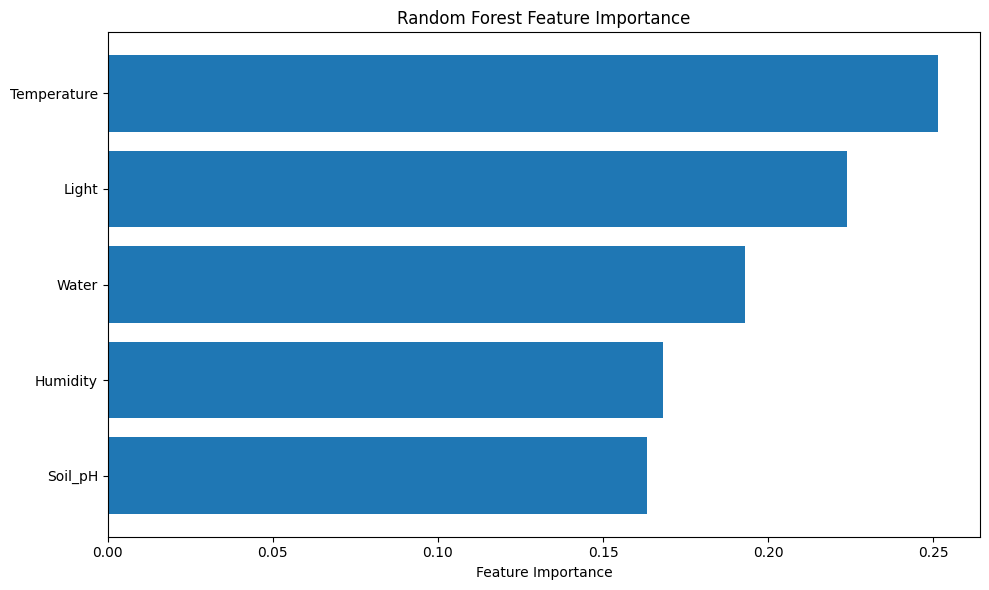

In [ ]:
# Plant Health Monitor: Predict plant health from environmental conditions
# A unique supervised learning project for first-year students

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# ----- Part 1: Generate Synthetic Dataset -----
# Since this is an educational project, we'll create synthetic data
# that simulates environmental conditions and plant health

def generate_plant_data(n_samples=500):
    """Generate synthetic plant health data based on environmental conditions"""

    # Environmental features
    temperature = np.random.normal(23, 5, n_samples)  # Temperature in Celsius
    humidity = np.random.normal(60, 15, n_samples)    # Humidity percentage
    light = np.random.normal(70, 20, n_samples)       # Light intensity (0-100)
    water = np.random.normal(65, 15, n_samples)       # Soil moisture (0-100)

    # Add some noise to make data more realistic
    soil_pH = np.random.normal(6.5, 0.8, n_samples)   # Soil pH

    # Create feature matrix
    X = np.column_stack([temperature, humidity, light, water, soil_pH])

    # Generate target variable (plant health) based on conditions
    y = []

    for i in range(n_samples):
        # Base score calculation
        health_score = 0

        # Temperature effect (plants like moderate temperatures)
        if 18 <= temperature[i] <= 26:
            health_score += 25
        elif 15 <= temperature[i] < 18 or 26 < temperature[i] <= 30:
            health_score += 15
        else:
            health_score += 5

        # Humidity effect
        if 50 <= humidity[i] <= 75:
            health_score += 20
        elif 40 <= humidity[i] < 50 or 75 < humidity[i] <= 85:
            health_score += 12
        else:
            health_score += 4

        # Light effect
        if 60 <= light[i] <= 85:
            health_score += 20
        elif 40 <= light[i] < 60 or 85 < light[i] <= 95:
            health_score += 12
        else:
            health_score += 4

        # Water effect
        if 60 <= water[i] <= 75:
            health_score += 25
        elif 45 <= water[i] < 60 or 75 < water[i] <= 85:
            health_score += 15
        else:
            health_score += 5

        # pH effect
        if 6.0 <= soil_pH[i] <= 7.0:
            health_score += 10
        elif 5.5 <= soil_pH[i] < 6.0 or 7.0 < soil_pH[i] <= 7.5:
            health_score += 6
        else:
            health_score += 2

        # Add some randomness to make it more realistic
        health_score += random.randint(-10, 10)

        # Classify plant health
        if health_score >= 80:
            y.append(2)  # Healthy
        elif health_score >= 50:
            y.append(1)  # Moderate
        else:
            y.append(0)  # Unhealthy

    return X, np.array(y)

# Generate data
X, y = generate_plant_data(500)

# Create DataFrame for better visualization
columns = ['Temperature', 'Humidity', 'Light', 'Water', 'Soil_pH']
plant_df = pd.DataFrame(X, columns=columns)
plant_df['Health'] = y
plant_df['Health_Status'] = plant_df['Health'].map({0: 'Unhealthy', 1: 'Moderate', 2: 'Healthy'})

# ----- Part 2: Exploratory Data Analysis -----
print("Dataset Overview:")
print(plant_df.head())
print("\nDataset Information:")
print(plant_df.info())
print("\nStatistical Summary:")
print(plant_df.describe())

print("\nTarget Class Distribution:")
print(plant_df['Health_Status'].value_counts())

# Plot the distribution of features by plant health status
plt.figure(figsize=(15, 10))
for i, feature in enumerate(columns):
    plt.subplot(2, 3, i+1)
    for health_status in [0, 1, 2]:
        data = plant_df[plant_df['Health'] == health_status][feature]
        plt.hist(data, alpha=0.5, bins=15, label=f"{plant_df['Health_Status'].map({0: 'Unhealthy', 1: 'Moderate', 2: 'Healthy'})[health_status]}")
    plt.title(f'{feature} Distribution by Plant Health')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.savefig('feature_distributions.png')

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
correlation = plant_df.drop('Health_Status', axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Plant Health Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')

# Visualize relationship between variables using pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(plant_df, hue='Health_Status', diag_kind='kde', height=2)
plt.suptitle('Pairplot of Plant Health Features', y=1.02)
plt.savefig('pairplot.png')

# ----- Part 3: Data Preprocessing -----
# Prepare the data for modeling
X = plant_df.drop(['Health', 'Health_Status'], axis=1)
y = plant_df['Health']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# ----- Part 4: Model Building and Evaluation -----
# Create pipelines for different models
models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(random_state=42, max_iter=1000))
    ]),
    'K-Nearest Neighbors': Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ]),
    'Random Forest': Pipeline([
        ('model', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, pipeline in models.items():
    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    }

    # Print results
    print(f"\n{name} Results:")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Cross-Validation: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

# ----- Part 5: Visualization of Results -----
# Compare model performances
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]
cv_means = [results[model]['cv_mean'] for model in model_names]

x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Test Accuracy')
plt.bar(x + width/2, cv_means, width, label='CV Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('model_comparison.png')

# ----- Part 6: Feature Importance Analysis -----
# Extract feature importances from Random Forest model
if 'Random Forest' in models:
    rf_model = models['Random Forest'].named_steps['model']
    feature_importances = rf_model.feature_importances_

    plt.figure(figsize=(10, 6))
    features = X.columns
    indices = np.argsort(feature_importances)

    plt.barh(range(len(indices)), feature_importances[indices], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.title('Random Forest Feature Importance')
    plt.tight_layout()
    plt.savefig('feature_importance.png')

    print("\nFeature Importance (Random Forest):")
    for i, feature in enumerate(features):
        print(f"{feature}: {feature_importances[i]:.4f}")

# ----- Part 7: Create Plant Health Prediction Function -----
# Determine the best model based on cross-validation
best_model_name = max(results, key=lambda x: results[x]['cv_mean'])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with CV Accuracy: {results[best_model_name]['cv_mean']:.4f}")

def predict_plant_health(temperature, humidity, light, water, soil_pH):
    """Predict plant health status based on environmental conditions"""
    # Create feature array
    features = np.array([[temperature, humidity, light, water, soil_pH]])

    # Make a prediction
    prediction = best_model.predict(features)[0]

    # Map the prediction to health status
    health_map = {0: 'Unhealthy', 1: 'Moderate', 2: 'Healthy'}

    return health_map[prediction]

def get_plant_recommendations(health_status, features):
    """Provide recommendations based on plant health status and conditions"""
    recommendations = []

    temperature, humidity, light, water, soil_pH = features

    if health_status == 'Unhealthy' or health_status == 'Moderate':
        # Temperature recommendations
        if temperature < 18:
            recommendations.append("Increase temperature - current level is too low.")
        elif temperature > 26:
            recommendations.append("Decrease temperature - current level is too high.")

        # Humidity recommendations
        if humidity < 50:
            recommendations.append("Increase humidity - current level is too low.")
        elif humidity > 75:
            recommendations.append("Decrease humidity - current level is too high.")

        # Light recommendations
        if light < 60:
            recommendations.append("Increase light exposure - current level is insufficient.")
        elif light > 85:
            recommendations.append("Decrease light exposure - current level is too intense.")

        # Water recommendations
        if water < 60:
            recommendations.append("Increase watering - soil is too dry.")
        elif water > 75:
            recommendations.append("Decrease watering - soil is too wet.")

        # pH recommendations
        if soil_pH < 6.0:
            recommendations.append("Increase soil pH - current level is too acidic.")
        elif soil_pH > 7.0:
            recommendations.append("Decrease soil pH - current level is too alkaline.")

    if not recommendations:
        if health_status == 'Healthy':
            recommendations.append("All environmental conditions are optimal. Keep maintaining current conditions.")
        else:
            recommendations.append("Consider adjusting environmental factors slightly to improve plant health.")

    return recommendations

# ----- Part 8: Interactive Plant Health Assessment -----
print("\n===== Plant Health Monitor: Interactive Assessment =====")
print("Enter environmental conditions to predict plant health:")

# Example use case
sample_conditions = [
    (22, 65, 75, 65, 6.5),  # Expected: Healthy
    (32, 30, 95, 40, 5.0),  # Expected: Unhealthy
    (20, 70, 65, 72, 6.2)   # Expected: Healthy
]

for idx, conditions in enumerate(sample_conditions):
    temperature, humidity, light, water, soil_pH = conditions

    health = predict_plant_health(temperature, humidity, light, water, soil_pH)
    recommendations = get_plant_recommendations(health, conditions)

    print(f"\nSample Plant {idx+1}:")
    print(f"Conditions: Temperature={temperature}°C, Humidity={humidity}%, Light={light}/100, Water={water}/100, Soil pH={soil_pH}")
    print(f"Predicted Health Status: {health}")

    print("Recommendations:")
    for i, rec in enumerate(recommendations):
        print(f"  {i+1}. {rec}")

# ----- Part 9: Save the Model for Future Use -----
import joblib

# Save the best model
joblib.dump(best_model, 'plant_health_model.pkl')

print("\nProject completed successfully! Model saved as 'plant_health_model.pkl'")